# Comparing sources

The sources we're harvesting are heavily interconnected and we're likely to be retrieving the same link for a record from different sources – for example ADB links can be retrieved both from Trove and Wikidata. I thought it might be interesting to do some comparisons.

In [156]:
import pandas as pd
from matplotlib_venn import venn2

## ADB

### Via Trove

In [104]:
df_trove_links = pd.concat([pd.read_json("ausstage_trove_links_20221005.json"), pd.read_json("daao_trove_links_20221004.json")])
trove_adb = df_trove_links.copy().loc[df_trove_links["related_source"] == "AU-ANU:ADBO"]
trove_adb.rename(columns={"related_source_url": "related_url", "related_source_id": "related_id"}, inplace=True)
# How many?
trove_adb.shape[0]

410

As noted elsewhere, there are some duplicates within each dataset. So we'll remove them before combining.

In [105]:
trove_adb.drop_duplicates(subset=["related_url"], inplace=True)
trove_adb.shape[0]

389

### Via Wikidata

In [106]:
df_wd_links = pd.concat([pd.read_json("ausstage_wd_all_links_20221006.json"), pd.read_json("daao_wd_all_links_20221006.json")])
wd_adb = df_wd_links.copy().loc[df_wd_links["related_source"] == "Australian Dictionary of Biography ID"]
wd_adb.rename(columns={"wd_label": "related_source_name"}, inplace=True)
# How many?
wd_adb.shape[0]

495

As noted elsewhere, there are some duplicates within each dataset. So we'll remove them before combining.

In [107]:
wd_adb.drop_duplicates(subset=["related_url"], inplace=True)
wd_adb.shape[0]

475

### Combined

Now we'll combine the de-duplicated datasets.

In [108]:
adb_combined = pd.concat([trove_adb, wd_adb])
adb_combined.shape[0]

864

We'll do some normalising of the urls.

In [109]:
adb_combined["adb_url"] = adb_combined["related_url"].apply(lambda x: x.replace("http://", "https://").strip("/")) 

Here's the list of overlaps.

In [110]:
overlaps = adb_combined.loc[adb_combined.duplicated(subset=["adb_url"], keep=False)].sort_values(by=["adb_url", "related_source"])
overlaps

,acde_source,or_id,related_source,related_id,related_url,related_source_name,wd_url,adb_url
68679,AusStage,454066,AU-ANU:ADBO,4976,http://adb.anu.edu.au/biography/agnew-roy-ewin...,Roy Ewing Agnew,NaN,https://adb.anu.edu.au/biography/agnew-roy-ewi...
4632,AusStage,454066,Australian Dictionary of Biography ID,agnew-roy-ewing-robert-4976,https://adb.anu.edu.au/biography/agnew-roy-ewi...,Roy Agnew,http://www.wikidata.org/entity/Q7372510,https://adb.anu.edu.au/biography/agnew-roy-ewi...
957,DAAO,4da1a387b538b73d93018caa,AU-ANU:ADBO,9369,http://adb.anu.edu.au/biography/annand-douglas...,Douglas Shenton Annand,NaN,https://adb.anu.edu.au/biography/annand-dougla...
19978,DAAO,douglas-annand,Australian Dictionary of Biography ID,annand-douglas-shenton-9369,https://adb.anu.edu.au/biography/annand-dougla...,Douglas Annand,http://www.wikidata.org/entity/Q5301207,https://adb.anu.edu.au/biography/annand-dougla...
1041,DAAO,4e5206f6d707ff1dc7002ff3,AU-ANU:ADBO,12154,http://adb.anu.edu.au/biography/atyeo-samuel-l...,Samuel Laurence Atyeo,NaN,https://adb.anu.edu.au/biography/atyeo-samuel-...
...,...,...,...,...,...,...,...,...
16791,DAAO,brett-whiteley,Australian Dictionary of Biography ID,whiteley-brett-17651,https://adb.anu.edu.au/biography/whiteley-bret...,Brett Whiteley,http://www.wikidata.org/entity/Q176409,https://adb.anu.edu.au/biography/whiteley-bret...
2624,DAAO,4da1ae86b538b73d9301ce0c,AU-ANU:ADBO,12048,http://adb.anu.edu.au/biography/wilson-lawrenc...,Lawrence George Wilson,NaN,https://adb.anu.edu.au/biography/wilson-lawren...
19224,DAAO,lawrence-george-wilson,Australian Dictionary of Biography ID,wilson-lawrence-george-12048,https://adb.anu.edu.au/biography/wilson-lawren...,Laurie Wilson,http://www.wikidata.org/entity/Q21536200,https://adb.anu.edu.au/biography/wilson-lawren...
8851,AusStage,228069,AU-ANU:ADBO,9218,http://adb.anu.edu.au/biography/young-william-...,William Blamire Young,NaN,https://adb.anu.edu.au/biography/young-william...


In [115]:
print(f"{overlaps.shape[0] // 2} ADB urls are duplicated between datasets")
print(f"There are {adb_combined.shape[0] - overlaps.shape[0]} ADB links that are not shared between Trove and Wikidata")
print(f"There are {adb_combined.drop_duplicates(subset=['adb_url']).shape[0]} unique ADB urls in the comined datasets")

74 ADB urls are duplicated between datasets
There are 716 ADB links that are not shared between Trove and Wikidata
There are 790 unique ADB urls in the comined datasets


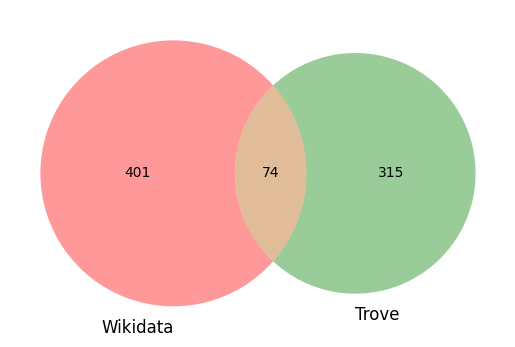

In [159]:
venn2(subsets = (wd_adb.shape[0] - 74, trove_adb.shape[0] - 74, 74), set_labels = ('Wikidata', 'Trove'))

## VIAF

I've harvested VIAF records directly by using the Libraries Australia identifier from Trove. But there are also many VIAF records attached to Wikidata entities.

### Via Trove

In [150]:
df_trove_viaf = pd.concat([pd.read_json("daao_viaf_links_20221006.json"), pd.read_json("ausstage_viaf_links_20221006.json")])
df_trove_viaf.rename(columns={"related_source_url": "related_url", "related_source_id": "related_url"}, inplace=True)
df_trove_viaf = df_trove_viaf.loc[df_trove_viaf["related_source"] == "VIAF"]
df_trove_viaf.shape[0]

5453

In [151]:
# Just in case
df_trove_viaf.drop_duplicates(subset=["related_url"], inplace=True)
df_trove_viaf.shape[0]

5217

### Via Wikidata

In [138]:
df_wd_viaf = pd.concat([pd.read_json("ausstage_wd_all_links_20221006.json"), pd.read_json("daao_wd_all_links_20221006.json")])
df_wd_viaf = df_wd_viaf.loc[df_wd_viaf["related_source"] == "VIAF ID"]
df_wd_viaf.shape[0]

2279

In [139]:
df_wd_viaf.drop_duplicates(subset=["related_id"], inplace=True)
df_wd_viaf.shape[0]

2216

### Combined

In [152]:
viaf_combined = pd.concat([df_wd_viaf, df_trove_viaf])
viaf_combined.shape[0]

7433

In [153]:
viaf_combined["viaf_url"] = viaf_combined["related_url"].apply(lambda x: x.replace("http://", "https://").strip("/") if isinstance(x, str) else x)

In [154]:
overlaps = viaf_combined.loc[viaf_combined.duplicated(subset=["viaf_url"], keep=False)].sort_values(by=["viaf_url", "related_source"])
overlaps

,acde_source,or_id,related_source,related_id,related_url,wd_url,wd_label,viaf_url
14744,AusStage,228157,VIAF,NaN,https://viaf.org/viaf/100242622/,NaN,NaN,https://viaf.org/viaf/100242622
1556,AusStage,228157,VIAF ID,100242622,https://viaf.org/viaf/100242622/,http://www.wikidata.org/entity/Q294454,Peter Finch,https://viaf.org/viaf/100242622
1695,AusStage,1,VIAF,NaN,https://viaf.org/viaf/100244098/,NaN,NaN,https://viaf.org/viaf/100244098
17359,AusStage,1,VIAF ID,100244098,https://viaf.org/viaf/100244098/,http://www.wikidata.org/entity/Q297794,Yasmina Reza,https://viaf.org/viaf/100244098
24683,AusStage,236039,VIAF,NaN,https://viaf.org/viaf/10032291/,NaN,NaN,https://viaf.org/viaf/10032291
...,...,...,...,...,...,...,...,...
15964,DAAO,djambawa-marawili-1,VIAF ID,9925148390858810830007,https://viaf.org/viaf/9925148390858810830007/,http://www.wikidata.org/entity/Q21454246,Djambawa Marawili,https://viaf.org/viaf/9925148390858810830007
17424,AusStage,229842,VIAF,NaN,https://viaf.org/viaf/99813949/,NaN,NaN,https://viaf.org/viaf/99813949
21296,AusStage,229842,VIAF ID,99813949,https://viaf.org/viaf/99813949/,http://www.wikidata.org/entity/Q234392,Ngaio Marsh,https://viaf.org/viaf/99813949
53682,AusStage,548098,VIAF,NaN,https://viaf.org/viaf/99835198/,NaN,NaN,https://viaf.org/viaf/99835198


In [155]:
print(f"{overlaps.shape[0] // 2} VIAF urls are duplicated between datasets")
print(f"There are {viaf_combined.shape[0] - overlaps.shape[0]} VIAF links that are not shared between Trove and Wikidata")
print(f"There are {viaf_combined.drop_duplicates(subset=['viaf_url']).shape[0]} unique VIAF urls in the comined datasets")

416 VIAF urls are duplicated between datasets
There are 6601 VIAF links that are not shared between Trove and Wikidata
There are 7017 unique VIAF urls in the comined datasets


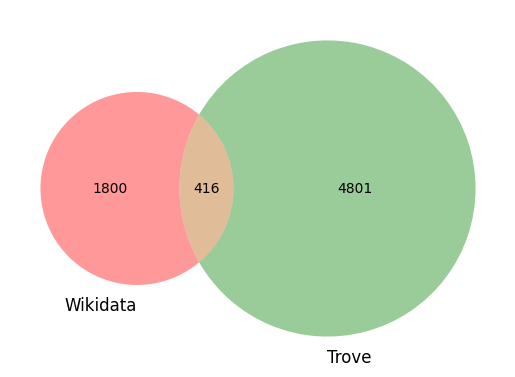

In [158]:
venn2(subsets = (df_wd_viaf.shape[0] - 416, df_trove_viaf.shape[0] - 416, 416), set_labels = ('Wikidata', 'Trove'))